In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import math
import random
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Activation, LSTM
from keras.engine import input_layer
from keras.models import Sequential
from tensorflow.keras import layers


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#발전기명, 년월일, 설비용량(MW)	01시	02시	03시	04시	05시	06시	07시	08시	09시	10시	11시	12시	13시	14시	15시	16시	17시	18시	19시	20시	21시	22시	23시	24시

dataset1 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_세종.csv', encoding='cp949')
dataset2 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_안산.csv', encoding='cp949')
dataset3 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_영암.csv', encoding='cp949')

dataset1.head()

,발전기명,년월일,설비용량(MW),1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,세종시폐기물매립장태양광,2017-01-01,1.628,0,0,0,0,0,0,0,...,742080,334440,87240,2880,4320,0,0,0,0,0
1,세종시폐기물매립장태양광,2017-01-02,1.628,0,0,0,0,0,0,0,...,606360,501120,158280,2760,3360,0,0,0,0,0
2,세종시폐기물매립장태양광,2017-01-03,1.628,0,0,0,0,0,0,0,...,881040,557040,128640,2280,3000,0,0,0,0,0
3,세종시폐기물매립장태양광,2017-01-04,1.628,0,0,0,0,0,0,0,...,677280,502320,112080,1800,2760,0,0,0,0,0
4,세종시폐기물매립장태양광,2017-01-05,1.628,0,0,0,0,0,0,0,...,259560,138840,45000,2520,2880,0,0,0,0,0


### * nan 값 0으로 대체

In [3]:
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("Before : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)

dataset1, dataset2, dataset3 = dataset1.fillna(0), dataset2.fillna(0), dataset3.fillna(0)
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("After : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)


Before :  0 0 0
After :  0 0 0


In [4]:
new_dataset1, new_dataset2, new_dataset3 = [], [], []

for i in range(len(dataset1)):
    new_dataset1.extend(dataset1.iloc[i,3:])

for i in range(len(dataset2)):
    new_dataset2.extend(dataset2.iloc[i,3:])

for i in range(len(dataset3)):
    new_dataset3.extend(dataset3.iloc[i,3:])
    
len(new_dataset1), len(new_dataset2), len(new_dataset3)

(40608, 40608, 40608)

In [5]:
df = pd.DataFrame({'local':new_dataset2})

train_dataset = df.sample(frac=0.857,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
#train_stats.pop("local3")
train_stats = train_stats.transpose()
train_stats

#레이블
train_labels = train_dataset#.pop('local3')
test_labels = test_dataset#.pop('local3')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data = np.array(normed_train_data)
normed_test_data = np.array(normed_test_data)

normed_train_data = np.reshape(normed_train_data, (normed_train_data.shape[0], 1, normed_train_data.shape[1]))
normed_test_data = np.reshape(normed_test_data, (normed_test_data.shape[0], 1, normed_test_data.shape[1]))

In [6]:
def build_model():
    model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(1,len(train_dataset.keys()))),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',  optimizer='adam', metrics=['mae', 'mse'])
    return model

In [7]:
#레이블
train_labels = train_dataset#.pop('local3')
test_labels = test_dataset#.pop('local3')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [8]:
model = build_model()

In [9]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1) #bactch_size

Epoch 1/1000
870/870 [==============================] - 3s 2ms/step - loss: 117896265728.0000 - mae: 183134.4844 - mse: 117896265728.0000 - val_loss: 11025586176.0000 - val_mae: 76439.7031 - val_mse: 11025586176.0000
Epoch 2/1000
870/870 [==============================] - 1s 1ms/step - loss: 1702671488.0000 - mae: 32768.7734 - mse: 1702671488.0000 - val_loss: 626245632.0000 - val_mae: 22669.8828 - val_mse: 626245632.0000
Epoch 3/1000
870/870 [==============================] - 1s 1ms/step - loss: 527851968.0000 - mae: 20887.4121 - mse: 527851968.0000 - val_loss: 452823872.0000 - val_mae: 19396.6113 - val_mse: 452823872.0000
Epoch 4/1000
870/870 [==============================] - 1s 1ms/step - loss: 386835904.0000 - mae: 17778.2812 - mse: 386835904.0000 - val_loss: 319590112.0000 - val_mae: 16117.7734 - val_mse: 319590112.0000
Epoch 5/1000
870/870 [==============================] - 1s 1ms/step - loss: 258958896.0000 - mae: 14359.2129 - mse: 258958896.0000 - val_loss: 199612304.0000 - val

870/870 [==============================] - 1s 1ms/step - loss: 6836.2539 - mae: 29.4449 - mse: 6836.2539 - val_loss: 1543.3387 - val_mae: 26.1683 - val_mse: 1543.3387
Epoch 45/1000
870/870 [==============================] - 1s 1ms/step - loss: 2162.6562 - mae: 24.2712 - mse: 2162.6562 - val_loss: 1344.8167 - val_mae: 24.5236 - val_mse: 1344.8167
Epoch 46/1000
870/870 [==============================] - 1s 1ms/step - loss: 32756.8477 - mae: 42.0030 - mse: 32756.8477 - val_loss: 490.7792 - val_mae: 13.5123 - val_mse: 490.7792
Epoch 47/1000
870/870 [==============================] - 1s 1ms/step - loss: 452.3312 - mae: 13.4236 - mse: 452.3312 - val_loss: 974.8757 - val_mae: 24.3169 - val_mse: 974.8757
Epoch 48/1000
870/870 [==============================] - 1s 1ms/step - loss: 629.1818 - mae: 15.6724 - mse: 629.1818 - val_loss: 383.2253 - val_mae: 11.1143 - val_mse: 383.2253
Epoch 49/1000
870/870 [==============================] - 1s 1ms/step - loss: 4264.8525 - mae: 26.9322 - mse: 4264.852

Epoch 90/1000
870/870 [==============================] - 1s 2ms/step - loss: 801.4039 - mae: 16.9527 - mse: 801.4039 - val_loss: 3694.6343 - val_mae: 34.5793 - val_mse: 3694.6343
Epoch 91/1000
870/870 [==============================] - 1s 2ms/step - loss: 9983.3496 - mae: 37.6723 - mse: 9983.3496 - val_loss: 1091.4194 - val_mae: 23.9440 - val_mse: 1091.4194
Epoch 92/1000
870/870 [==============================] - 2s 2ms/step - loss: 711.2009 - mae: 16.1680 - mse: 711.2009 - val_loss: 334.4891 - val_mae: 13.2557 - val_mse: 334.4891
Epoch 93/1000
870/870 [==============================] - 2s 2ms/step - loss: 9738.9277 - mae: 28.4932 - mse: 9738.9277 - val_loss: 317.4603 - val_mae: 11.9557 - val_mse: 317.4603
Epoch 94/1000
870/870 [==============================] - 2s 2ms/step - loss: 6119.6362 - mae: 29.9806 - mse: 6119.6362 - val_loss: 10827.4697 - val_mae: 59.8321 - val_mse: 10827.4697
Epoch 95/1000
870/870 [==============================] - 2s 2ms/step - loss: 2608.7185 - mae: 20.1265

870/870 [==============================] - 1s 2ms/step - loss: 3701.0413 - mae: 24.8943 - mse: 3701.0413 - val_loss: 59160.1992 - val_mae: 154.4911 - val_mse: 59160.1992
Epoch 136/1000
870/870 [==============================] - 2s 2ms/step - loss: 4448.1499 - mae: 25.0896 - mse: 4448.1499 - val_loss: 258.2017 - val_mae: 9.6935 - val_mse: 258.2017
Epoch 137/1000
870/870 [==============================] - 1s 2ms/step - loss: 8324.3232 - mae: 35.8224 - mse: 8324.3232 - val_loss: 394.8627 - val_mae: 14.1917 - val_mse: 394.8627
Epoch 138/1000
870/870 [==============================] - 2s 2ms/step - loss: 4686.2075 - mae: 24.0464 - mse: 4686.2075 - val_loss: 222.5779 - val_mae: 9.9841 - val_mse: 222.5779
Epoch 139/1000
870/870 [==============================] - 1s 2ms/step - loss: 816.4650 - mae: 17.3308 - mse: 816.4650 - val_loss: 367.2891 - val_mae: 12.9407 - val_mse: 367.2891
Epoch 140/1000
870/870 [==============================] - 1s 2ms/step - loss: 5658.2832 - mae: 27.9069 - mse: 5658

870/870 [==============================] - 2s 2ms/step - loss: 318.4636 - mae: 11.7437 - mse: 318.4636 - val_loss: 1116.6516 - val_mae: 22.6792 - val_mse: 1116.6516
Epoch 181/1000
870/870 [==============================] - 2s 2ms/step - loss: 3650.7131 - mae: 23.5420 - mse: 3650.7131 - val_loss: 382.0160 - val_mae: 12.8718 - val_mse: 382.0160
Epoch 182/1000
870/870 [==============================] - 2s 2ms/step - loss: 7972.5332 - mae: 37.9318 - mse: 7972.5332 - val_loss: 1138.0151 - val_mae: 20.2548 - val_mse: 1138.0151
Epoch 183/1000
870/870 [==============================] - 2s 2ms/step - loss: 5556.9385 - mae: 30.8591 - mse: 5556.9385 - val_loss: 231.4866 - val_mae: 11.2066 - val_mse: 231.4866
Epoch 184/1000
870/870 [==============================] - 2s 2ms/step - loss: 2114.2830 - mae: 23.7631 - mse: 2114.2830 - val_loss: 194.6586 - val_mae: 8.7768 - val_mse: 194.6586
Epoch 185/1000
870/870 [==============================] - 2s 2ms/step - loss: 5339.5337 - mae: 35.3471 - mse: 5339

870/870 [==============================] - 1s 2ms/step - loss: 17444.0605 - mae: 41.5381 - mse: 17444.0605 - val_loss: 178.7930 - val_mae: 9.0755 - val_mse: 178.7930
Epoch 226/1000
870/870 [==============================] - 1s 2ms/step - loss: 246.3389 - mae: 10.0285 - mse: 246.3389 - val_loss: 174.6142 - val_mae: 7.8700 - val_mse: 174.6142
Epoch 227/1000
870/870 [==============================] - 1s 2ms/step - loss: 1047.3278 - mae: 17.1207 - mse: 1047.3278 - val_loss: 8241.0029 - val_mae: 62.1490 - val_mse: 8241.0029
Epoch 228/1000
870/870 [==============================] - 2s 2ms/step - loss: 2961.6367 - mae: 25.8330 - mse: 2961.6367 - val_loss: 258.4424 - val_mae: 10.1587 - val_mse: 258.4424
Epoch 229/1000
870/870 [==============================] - 1s 2ms/step - loss: 9748.1904 - mae: 34.3661 - mse: 9748.1904 - val_loss: 206.4551 - val_mae: 9.0743 - val_mse: 206.4551
Epoch 230/1000
870/870 [==============================] - 2s 2ms/step - loss: 5247.0073 - mae: 25.0413 - mse: 5247.0

870/870 [==============================] - 2s 2ms/step - loss: 7196.8574 - mae: 33.9740 - mse: 7196.8574 - val_loss: 3971.9480 - val_mae: 35.5688 - val_mse: 3971.9480
Epoch 271/1000
870/870 [==============================] - 2s 2ms/step - loss: 8308.5088 - mae: 26.7188 - mse: 8308.5088 - val_loss: 156.1228 - val_mae: 6.8103 - val_mse: 156.1228
Epoch 272/1000
870/870 [==============================] - 2s 2ms/step - loss: 1570.3268 - mae: 16.9858 - mse: 1570.3268 - val_loss: 216.6985 - val_mae: 11.1885 - val_mse: 216.6985
Epoch 273/1000
870/870 [==============================] - 1s 2ms/step - loss: 11346.7578 - mae: 32.2908 - mse: 11346.7578 - val_loss: 155.7841 - val_mae: 8.4635 - val_mse: 155.7841
Epoch 274/1000
870/870 [==============================] - 2s 2ms/step - loss: 580.8392 - mae: 11.9742 - mse: 580.8392 - val_loss: 144.1121 - val_mae: 8.4040 - val_mse: 144.1121
Epoch 275/1000
870/870 [==============================] - 2s 2ms/step - loss: 14134.5645 - mae: 35.6707 - mse: 14134

870/870 [==============================] - 1s 2ms/step - loss: 50095.7148 - mae: 52.9100 - mse: 50095.7148 - val_loss: 142.7014 - val_mae: 7.1766 - val_mse: 142.7014
Epoch 316/1000
870/870 [==============================] - 2s 2ms/step - loss: 152.1635 - mae: 7.8888 - mse: 152.1635 - val_loss: 129.5763 - val_mae: 7.8248 - val_mse: 129.5763
Epoch 317/1000
870/870 [==============================] - 1s 2ms/step - loss: 289.7496 - mae: 10.2913 - mse: 289.7496 - val_loss: 291.2542 - val_mae: 14.1037 - val_mse: 291.2542
Epoch 318/1000
870/870 [==============================] - 2s 2ms/step - loss: 1988.6484 - mae: 18.4069 - mse: 1988.6484 - val_loss: 351.6450 - val_mae: 16.0315 - val_mse: 351.6450
Epoch 319/1000
870/870 [==============================] - 1s 2ms/step - loss: 4009.1541 - mae: 24.8142 - mse: 4009.1541 - val_loss: 3291.9744 - val_mae: 40.3362 - val_mse: 3291.9744
Epoch 320/1000
870/870 [==============================] - 2s 2ms/step - loss: 11126.8369 - mae: 33.5962 - mse: 11126.8

870/870 [==============================] - 1s 2ms/step - loss: 1146.6526 - mae: 17.0803 - mse: 1146.6526 - val_loss: 15009.6904 - val_mae: 68.8384 - val_mse: 15009.6904
Epoch 361/1000
870/870 [==============================] - 2s 2ms/step - loss: 9397.6514 - mae: 28.9865 - mse: 9397.6514 - val_loss: 717.8864 - val_mae: 17.4059 - val_mse: 717.8864
Epoch 362/1000
870/870 [==============================] - 2s 2ms/step - loss: 9678.8818 - mae: 25.5111 - mse: 9678.8818 - val_loss: 417.0445 - val_mae: 13.8903 - val_mse: 417.0445
Epoch 363/1000
870/870 [==============================] - 2s 2ms/step - loss: 3023.4172 - mae: 18.7533 - mse: 3023.4172 - val_loss: 45795.8203 - val_mae: 115.4305 - val_mse: 45795.8203
Epoch 364/1000
870/870 [==============================] - 2s 2ms/step - loss: 2314.7773 - mae: 20.2106 - mse: 2314.7773 - val_loss: 548.5306 - val_mae: 15.7157 - val_mse: 548.5306
Epoch 365/1000
870/870 [==============================] - 1s 2ms/step - loss: 33423.6719 - mae: 46.7088 - 

Epoch 406/1000
870/870 [==============================] - 2s 2ms/step - loss: 2839.6353 - mae: 24.4207 - mse: 2839.6353 - val_loss: 6233.6240 - val_mae: 43.1406 - val_mse: 6233.6240
Epoch 407/1000
870/870 [==============================] - 2s 2ms/step - loss: 12923.3857 - mae: 34.7371 - mse: 12923.3857 - val_loss: 141.5533 - val_mae: 6.9833 - val_mse: 141.5533
Epoch 408/1000
870/870 [==============================] - 2s 2ms/step - loss: 529.2055 - mae: 11.8512 - mse: 529.2055 - val_loss: 1532.3037 - val_mae: 25.6934 - val_mse: 1532.3037
Epoch 409/1000
870/870 [==============================] - 2s 2ms/step - loss: 9777.5176 - mae: 28.6684 - mse: 9777.5176 - val_loss: 105.9417 - val_mae: 6.9349 - val_mse: 105.9417
Epoch 410/1000
870/870 [==============================] - 2s 2ms/step - loss: 837.4515 - mae: 14.1477 - mse: 837.4515 - val_loss: 110.1184 - val_mae: 8.0850 - val_mse: 110.1184
Epoch 411/1000
870/870 [==============================] - 2s 2ms/step - loss: 4015.5320 - mae: 20.650

870/870 [==============================] - 2s 2ms/step - loss: 3364.3357 - mae: 22.9904 - mse: 3364.3357 - val_loss: 930.1274 - val_mae: 21.6664 - val_mse: 930.1274
Epoch 452/1000
870/870 [==============================] - 2s 2ms/step - loss: 5588.8325 - mae: 21.2757 - mse: 5588.8325 - val_loss: 436.0726 - val_mae: 13.0336 - val_mse: 436.0726
Epoch 453/1000
870/870 [==============================] - 2s 2ms/step - loss: 9107.2705 - mae: 27.7782 - mse: 9107.2705 - val_loss: 103.1061 - val_mae: 6.5946 - val_mse: 103.1061
Epoch 454/1000
870/870 [==============================] - 2s 2ms/step - loss: 507.4357 - mae: 10.9021 - mse: 507.4357 - val_loss: 6336.9043 - val_mae: 46.4498 - val_mse: 6336.9043
Epoch 455/1000
870/870 [==============================] - 2s 2ms/step - loss: 4187.6831 - mae: 22.0656 - mse: 4187.6831 - val_loss: 246.6115 - val_mae: 9.9198 - val_mse: 246.6115
Epoch 456/1000
870/870 [==============================] - 2s 2ms/step - loss: 1686.1799 - mae: 14.8482 - mse: 1686.17

Epoch 497/1000
870/870 [==============================] - 2s 2ms/step - loss: 12406.8770 - mae: 32.5654 - mse: 12406.8770 - val_loss: 84.6031 - val_mae: 5.3916 - val_mse: 84.6031
Epoch 498/1000
870/870 [==============================] - 2s 2ms/step - loss: 126.5691 - mae: 7.0741 - mse: 126.5691 - val_loss: 99.8581 - val_mae: 8.0700 - val_mse: 99.8581
Epoch 499/1000
870/870 [==============================] - 2s 2ms/step - loss: 2893.1887 - mae: 16.7590 - mse: 2893.1887 - val_loss: 151232.2969 - val_mae: 209.3865 - val_mse: 151232.2969
Epoch 500/1000
870/870 [==============================] - 2s 2ms/step - loss: 3012.2793 - mae: 21.3828 - mse: 3012.2793 - val_loss: 1406.6841 - val_mae: 24.9608 - val_mse: 1406.6841
Epoch 501/1000
870/870 [==============================] - 2s 2ms/step - loss: 3393.1409 - mae: 20.3230 - mse: 3393.1409 - val_loss: 91.7655 - val_mae: 6.3510 - val_mse: 91.7655
Epoch 502/1000
870/870 [==============================] - 2s 2ms/step - loss: 2630.6165 - mae: 17.409

Epoch 543/1000
870/870 [==============================] - 2s 2ms/step - loss: 146.9632 - mae: 7.5925 - mse: 146.9632 - val_loss: 95.4044 - val_mae: 6.7553 - val_mse: 95.4044
Epoch 544/1000
870/870 [==============================] - 2s 2ms/step - loss: 301.5008 - mae: 9.9379 - mse: 301.5008 - val_loss: 1057.8668 - val_mae: 21.2378 - val_mse: 1057.8668
Epoch 545/1000
870/870 [==============================] - 2s 2ms/step - loss: 6277.5073 - mae: 27.1445 - mse: 6277.5073 - val_loss: 101.9163 - val_mae: 7.7808 - val_mse: 101.9163
Epoch 546/1000
870/870 [==============================] - 2s 2ms/step - loss: 818.8286 - mae: 12.9991 - mse: 818.8286 - val_loss: 81.8265 - val_mae: 6.4666 - val_mse: 81.8265
Epoch 547/1000
870/870 [==============================] - 2s 2ms/step - loss: 62205.4570 - mae: 57.9160 - mse: 62205.4570 - val_loss: 66.1616 - val_mae: 4.4673 - val_mse: 66.1616
Epoch 548/1000
870/870 [==============================] - 2s 2ms/step - loss: 77.2135 - mae: 5.5289 - mse: 77.2135

870/870 [==============================] - 2s 3ms/step - loss: 102.0305 - mae: 6.4498 - mse: 102.0305 - val_loss: 297.4197 - val_mae: 10.6089 - val_mse: 297.4197
Epoch 590/1000
870/870 [==============================] - 2s 3ms/step - loss: 6091.2021 - mae: 24.9869 - mse: 6091.2021 - val_loss: 91.4493 - val_mae: 6.9341 - val_mse: 91.4493
Epoch 591/1000
870/870 [==============================] - 2s 3ms/step - loss: 292.0891 - mae: 8.7528 - mse: 292.0891 - val_loss: 15908.7266 - val_mae: 96.6328 - val_mse: 15908.7266
Epoch 592/1000
870/870 [==============================] - 2s 3ms/step - loss: 9983.1025 - mae: 30.4379 - mse: 9983.1025 - val_loss: 115.9773 - val_mae: 7.6573 - val_mse: 115.9773
Epoch 593/1000
870/870 [==============================] - 2s 3ms/step - loss: 205.3511 - mae: 7.7935 - mse: 205.3511 - val_loss: 115.1021 - val_mae: 7.5475 - val_mse: 115.1021
Epoch 594/1000
870/870 [==============================] - 2s 3ms/step - loss: 4232.0630 - mae: 17.4026 - mse: 4232.0630 - val

870/870 [==============================] - 3s 3ms/step - loss: 442.8127 - mae: 9.8905 - mse: 442.8127 - val_loss: 3161.2124 - val_mae: 30.7818 - val_mse: 3161.2124
Epoch 636/1000
870/870 [==============================] - 3s 3ms/step - loss: 2829.0295 - mae: 18.4951 - mse: 2829.0295 - val_loss: 71.1613 - val_mae: 6.4650 - val_mse: 71.1613
Epoch 637/1000
870/870 [==============================] - 3s 3ms/step - loss: 2568.6440 - mae: 16.2069 - mse: 2568.6440 - val_loss: 60.4391 - val_mae: 5.3484 - val_mse: 60.4391
Epoch 638/1000
870/870 [==============================] - 3s 3ms/step - loss: 5026.6992 - mae: 21.8423 - mse: 5026.6992 - val_loss: 88.5969 - val_mae: 6.2177 - val_mse: 88.5969
Epoch 639/1000
870/870 [==============================] - 2s 3ms/step - loss: 966.5610 - mae: 11.6117 - mse: 966.5610 - val_loss: 78.2205 - val_mae: 6.6843 - val_mse: 78.2205
Epoch 640/1000
870/870 [==============================] - 3s 3ms/step - loss: 18146.4824 - mae: 31.7003 - mse: 18146.4824 - val_lo

870/870 [==============================] - 3s 3ms/step - loss: 78.4812 - mae: 5.5807 - mse: 78.4812 - val_loss: 68.4923 - val_mae: 6.4375 - val_mse: 68.4923
Epoch 682/1000
870/870 [==============================] - 2s 3ms/step - loss: 5894.9526 - mae: 22.8243 - mse: 5894.9526 - val_loss: 91.3396 - val_mae: 5.7805 - val_mse: 91.3396
Epoch 683/1000
870/870 [==============================] - 2s 3ms/step - loss: 247.8694 - mae: 8.3925 - mse: 247.8694 - val_loss: 94.4557 - val_mae: 7.5896 - val_mse: 94.4557
Epoch 684/1000
870/870 [==============================] - 2s 3ms/step - loss: 7523.1519 - mae: 23.6329 - mse: 7523.1519 - val_loss: 58.5220 - val_mae: 5.1239 - val_mse: 58.5220
Epoch 685/1000
870/870 [==============================] - 2s 3ms/step - loss: 1649.3522 - mae: 13.1760 - mse: 1649.3522 - val_loss: 54.4847 - val_mae: 3.8595 - val_mse: 54.4847
Epoch 686/1000
870/870 [==============================] - 2s 3ms/step - loss: 6617.5269 - mae: 20.4044 - mse: 6617.5269 - val_loss: 7162.8

870/870 [==============================] - 3s 4ms/step - loss: 2650.9365 - mae: 15.8012 - mse: 2650.9365 - val_loss: 38101.4141 - val_mae: 135.3530 - val_mse: 38101.4141
Epoch 728/1000
870/870 [==============================] - 3s 3ms/step - loss: 9224.1953 - mae: 20.6955 - mse: 9224.1953 - val_loss: 61.2626 - val_mae: 4.8257 - val_mse: 61.2626
Epoch 729/1000
870/870 [==============================] - 3s 3ms/step - loss: 3229.4141 - mae: 19.0510 - mse: 3229.4141 - val_loss: 56.5327 - val_mae: 5.0016 - val_mse: 56.5327
Epoch 730/1000
870/870 [==============================] - 3s 3ms/step - loss: 1944.7766 - mae: 15.6844 - mse: 1944.7766 - val_loss: 18822.6445 - val_mae: 74.1517 - val_mse: 18822.6445
Epoch 731/1000
870/870 [==============================] - 3s 3ms/step - loss: 3536.2981 - mae: 17.9216 - mse: 3536.2981 - val_loss: 67.1844 - val_mae: 5.2319 - val_mse: 67.1844
Epoch 732/1000
870/870 [==============================] - 3s 4ms/step - loss: 2578.2263 - mae: 16.9777 - mse: 2578.

870/870 [==============================] - 3s 4ms/step - loss: 74.7376 - mae: 5.6997 - mse: 74.7376 - val_loss: 88.6085 - val_mae: 6.4178 - val_mse: 88.6085
Epoch 774/1000
870/870 [==============================] - 3s 4ms/step - loss: 8467.3037 - mae: 28.7201 - mse: 8467.3037 - val_loss: 48.1126 - val_mae: 4.2539 - val_mse: 48.1126
Epoch 775/1000
870/870 [==============================] - 3s 4ms/step - loss: 80.4718 - mae: 5.7564 - mse: 80.4718 - val_loss: 53.2449 - val_mae: 4.5324 - val_mse: 53.2449
Epoch 776/1000
870/870 [==============================] - 3s 4ms/step - loss: 3016.1260 - mae: 20.3779 - mse: 3016.1260 - val_loss: 86123.3047 - val_mae: 216.6632 - val_mse: 86123.3047
Epoch 777/1000
870/870 [==============================] - 3s 4ms/step - loss: 6594.6392 - mae: 26.7085 - mse: 6594.6392 - val_loss: 71.4807 - val_mae: 6.6997 - val_mse: 71.4807
Epoch 778/1000
870/870 [==============================] - 3s 3ms/step - loss: 805.2064 - mae: 9.7043 - mse: 805.2064 - val_loss: 50.

870/870 [==============================] - 3s 4ms/step - loss: 10818.2773 - mae: 34.5053 - mse: 10818.2773 - val_loss: 46.3567 - val_mae: 3.8029 - val_mse: 46.3567
Epoch 820/1000
870/870 [==============================] - 3s 3ms/step - loss: 71.4425 - mae: 5.1562 - mse: 71.4425 - val_loss: 47.5872 - val_mae: 4.3729 - val_mse: 47.5872
Epoch 821/1000
870/870 [==============================] - 3s 3ms/step - loss: 5139.8706 - mae: 19.2845 - mse: 5139.8706 - val_loss: 62.5481 - val_mae: 5.9420 - val_mse: 62.5481
Epoch 822/1000
870/870 [==============================] - 3s 4ms/step - loss: 5870.3760 - mae: 23.2988 - mse: 5870.3760 - val_loss: 61.8842 - val_mae: 5.8699 - val_mse: 61.8842
Epoch 823/1000
870/870 [==============================] - 3s 3ms/step - loss: 111.4903 - mae: 6.3027 - mse: 111.4903 - val_loss: 58.6834 - val_mae: 5.2413 - val_mse: 58.6834
Epoch 824/1000
870/870 [==============================] - 3s 4ms/step - loss: 29170.5059 - mae: 35.5123 - mse: 29170.5059 - val_loss: 58

870/870 [==============================] - 3s 3ms/step - loss: 2905.7319 - mae: 15.7601 - mse: 2905.7319 - val_loss: 65.5480 - val_mae: 6.6011 - val_mse: 65.5480
Epoch 866/1000
870/870 [==============================] - 3s 3ms/step - loss: 2195.6946 - mae: 16.1200 - mse: 2195.6946 - val_loss: 65.2797 - val_mae: 6.5914 - val_mse: 65.2797
Epoch 867/1000
870/870 [==============================] - 3s 3ms/step - loss: 8898.5176 - mae: 21.0493 - mse: 8898.5176 - val_loss: 41.4253 - val_mae: 3.1398 - val_mse: 41.4253
Epoch 868/1000
870/870 [==============================] - 3s 3ms/step - loss: 5454.7251 - mae: 24.6544 - mse: 5454.7251 - val_loss: 61.9605 - val_mae: 5.2051 - val_mse: 61.9605
Epoch 869/1000
870/870 [==============================] - 3s 3ms/step - loss: 494.7569 - mae: 8.3167 - mse: 494.7569 - val_loss: 44.2729 - val_mae: 4.1975 - val_mse: 44.2729
Epoch 870/1000
870/870 [==============================] - 3s 3ms/step - loss: 2356.5732 - mae: 18.4297 - mse: 2356.5732 - val_loss: 2

870/870 [==============================] - 3s 3ms/step - loss: 47.7529 - mae: 4.4538 - mse: 47.7529 - val_loss: 44.7015 - val_mae: 4.1355 - val_mse: 44.7015
Epoch 912/1000
870/870 [==============================] - 3s 3ms/step - loss: 32316.7246 - mae: 33.4199 - mse: 32316.7246 - val_loss: 60.8465 - val_mae: 4.5032 - val_mse: 60.8465
Epoch 913/1000
870/870 [==============================] - 3s 3ms/step - loss: 50.0985 - mae: 4.4143 - mse: 50.0985 - val_loss: 42.5966 - val_mae: 3.7431 - val_mse: 42.5966
Epoch 914/1000
870/870 [==============================] - 3s 3ms/step - loss: 74.2466 - mae: 5.2687 - mse: 74.2466 - val_loss: 41.2723 - val_mae: 3.5853 - val_mse: 41.2723
Epoch 915/1000
870/870 [==============================] - 3s 3ms/step - loss: 6303.2344 - mae: 21.0008 - mse: 6303.2344 - val_loss: 46.7692 - val_mae: 5.0053 - val_mse: 46.7692
Epoch 916/1000
870/870 [==============================] - 3s 3ms/step - loss: 83.2348 - mae: 5.5971 - mse: 83.2348 - val_loss: 310.9471 - val_m

870/870 [==============================] - 2s 3ms/step - loss: 2088.6179 - mae: 19.2383 - mse: 2088.6179 - val_loss: 2936.2297 - val_mae: 35.4518 - val_mse: 2936.2297
Epoch 958/1000
870/870 [==============================] - 2s 3ms/step - loss: 7977.5615 - mae: 22.4143 - mse: 7977.5615 - val_loss: 178.3744 - val_mae: 11.0752 - val_mse: 178.3744
Epoch 959/1000
870/870 [==============================] - 2s 3ms/step - loss: 837.5255 - mae: 11.2280 - mse: 837.5255 - val_loss: 99.8345 - val_mae: 7.5781 - val_mse: 99.8345
Epoch 960/1000
870/870 [==============================] - 2s 3ms/step - loss: 3644.2043 - mae: 21.7102 - mse: 3644.2043 - val_loss: 38.3979 - val_mae: 3.3066 - val_mse: 38.3979
Epoch 961/1000
870/870 [==============================] - 2s 3ms/step - loss: 1006.2362 - mae: 12.8245 - mse: 1006.2362 - val_loss: 145.0031 - val_mae: 9.4006 - val_mse: 145.0031
Epoch 962/1000
870/870 [==============================] - 2s 3ms/step - loss: 5913.5029 - mae: 23.3490 - mse: 5913.5029 - 

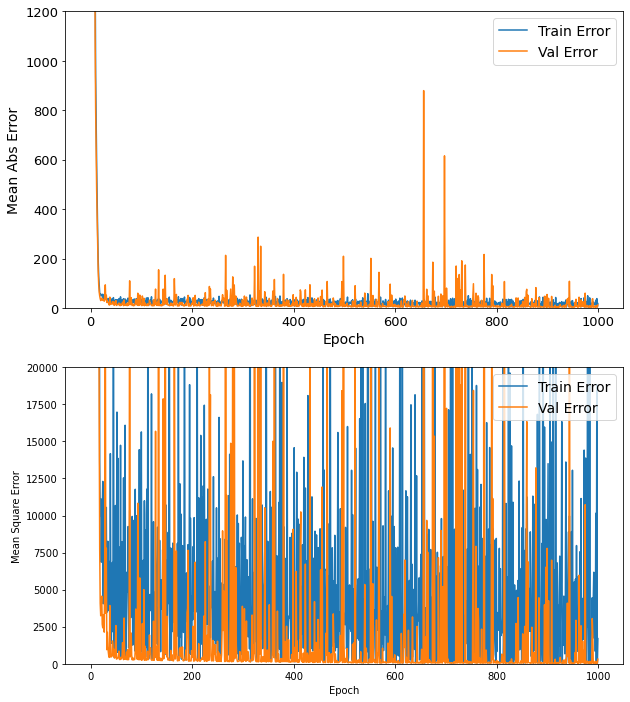

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean Abs Error', fontsize=14)
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,1200])
    plt.legend(fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,20000])
    plt.legend(fontsize=14)
    plt.show()

plot_history(history)

In [11]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} local1".format(mae))

182/182 - 0s - loss: 311.6798 - mae: 12.2028 - mse: 311.6798 - 280ms/epoch - 2ms/step
테스트 세트의 평균 절대 오차: 12.20 local1


In [12]:
255/255 - 0s - loss: 0.2571 - mae: 0.1948 - mse: 0.2571 - 170ms/epoch - 666us/step
테스트 세트의 평균 절대 오차:  0.19 local1

SyntaxError: invalid syntax (3753265536.py, line 1)